<a href="https://colab.research.google.com/github/EugeneHsiung/HHA550-Diabetes-data/blob/main/HHA550_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this Dataset

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

### https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# Dataset Attributes

1. encounter_id: Unique identifier of an encounter
2. patient_nbr: Unique identifier of a patient
3. race: Caucasian, Asian, African American, Hispanic, and other
4. gender: Male, female, and unknown/invalid
5. age: Grouped in 10-year intervals
6. weight: Weight in pounds
7. admission_type_id: Integer identifier corresponding to 9 distinct
values (e.g., emergency, urgent, elective, newborn, and not
available)
8. discharge_disposition_id: Integer identifier corresponding to 29
distinct values (e.g., discharged to home, expired, and not
available)
9. admission_source_id: Integer identifier corresponding to 21
distinct values (e.g., physician referral, emergency room, and
transfer from a hospital)
10. time_in_hospital: Integer number of days between admission and
discharge
11. payer_code: Integer identifier corresponding to 23 distinct
values (e.g., Blue Cross/Blue Shield, Medicare, and self-pay)
12. medical_specialty: Integer identifier of a specialty of the
admitting physician, corresponding to 84 distinct values (e.g.,
cardiology, internal medicine, family/general practice, and surgeon)
13. num_lab_procedures: Number of lab tests performed during the
encounter
14. num_procedures: Number of procedures (other than lab tests)
performed during the encounter
15. num_medications: Number of distinct generic names administered
during the encounter
16. number_outpatient: Number of outpatient visits of the patient in
the year preceding the encounter
17. number_emergency: Number of emergency visits of the patient in
the year preceding the encounter
18. number_inpatient: Number of inpatient visits of the patient in
the year preceding the encounter
19. diag_1: The primary diagnosis (coded as first three digits of
ICD9)
20. diag_2: Secondary diagnosis (coded as first three digits of ICD9)
21. diag_3: Additional secondary diagnosis (coded as first three
digits of ICD9)
22. number_diagnoses: Number of diagnoses entered to the system
23. max_glu_serum: Indicates the range of the result or if the test
was not taken. Values: >200, >300, normal, and none if not measured
24. A1Cresult: Indicates the range of the result or if the test was
not taken. Values: >8 if the result was greater than 8%, >7 if the
result was greater than 7% but less than 8%, normal if the result was
less than 7%, and none if not measured
25. metformin to metformin-pioglitazone: The feature indicates
whether the drug was prescribed or there was a change in the dosage.
Values: up if the dosage was increased during the encounter, down if
the dosage was decreased, steady if the dosage did not change, and no
if the drug was not prescribed
26. change: Indicates if there was a change in diabetic medications
(either dosage or generic name). Values: change and no change
27. diabetesMed: Indicates if there was any diabetic medication
prescribed. Values: yes and no
28. readmitted: Days to inpatient readmission. Values: <30 if the
patient was readmitted in less than 30 days, >30 if the patient was
readmitted in more than 30 days, and No for no record of readmission.

 # Import Packages

In [81]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
!pip install seaborn
!pip install missingno
!pip install xgboost
!pip install catboost
!pip install regex
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install imblearn
!pip install lightgbm

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Loading Packages

In [82]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [83]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [84]:
df = pd.read_csv('/content/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Check for Missing Data / Missing Values

In [86]:
df1 = df.replace('?', np.nan)
df1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [87]:
def missing (df1):
 missing_number = df1.isnull().sum().sort_values(ascending=False)
 missing_percent = (df1.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
 missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
 return missing_values
missing(df1)

,Missing_Number,Missing_Percent
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
encounter_id,0,0.000000
tolazamide,0,0.000000
glyburide,0,0.000000


# Checking for duplicates

In [88]:
df1.duplicated().sum()

0

# Dropping Columns

In [89]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [90]:
df1.drop(['encounter_id',
 'patient_nbr',
 'medical_specialty',
 'admission_source_id'], axis = 1, inplace = True)
df1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,NaN,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,3,NaN,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,2,NaN,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,2,NaN,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,1,NaN,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,3,MC,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,MC,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,1,MC,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,10,MC,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


<Axes: >

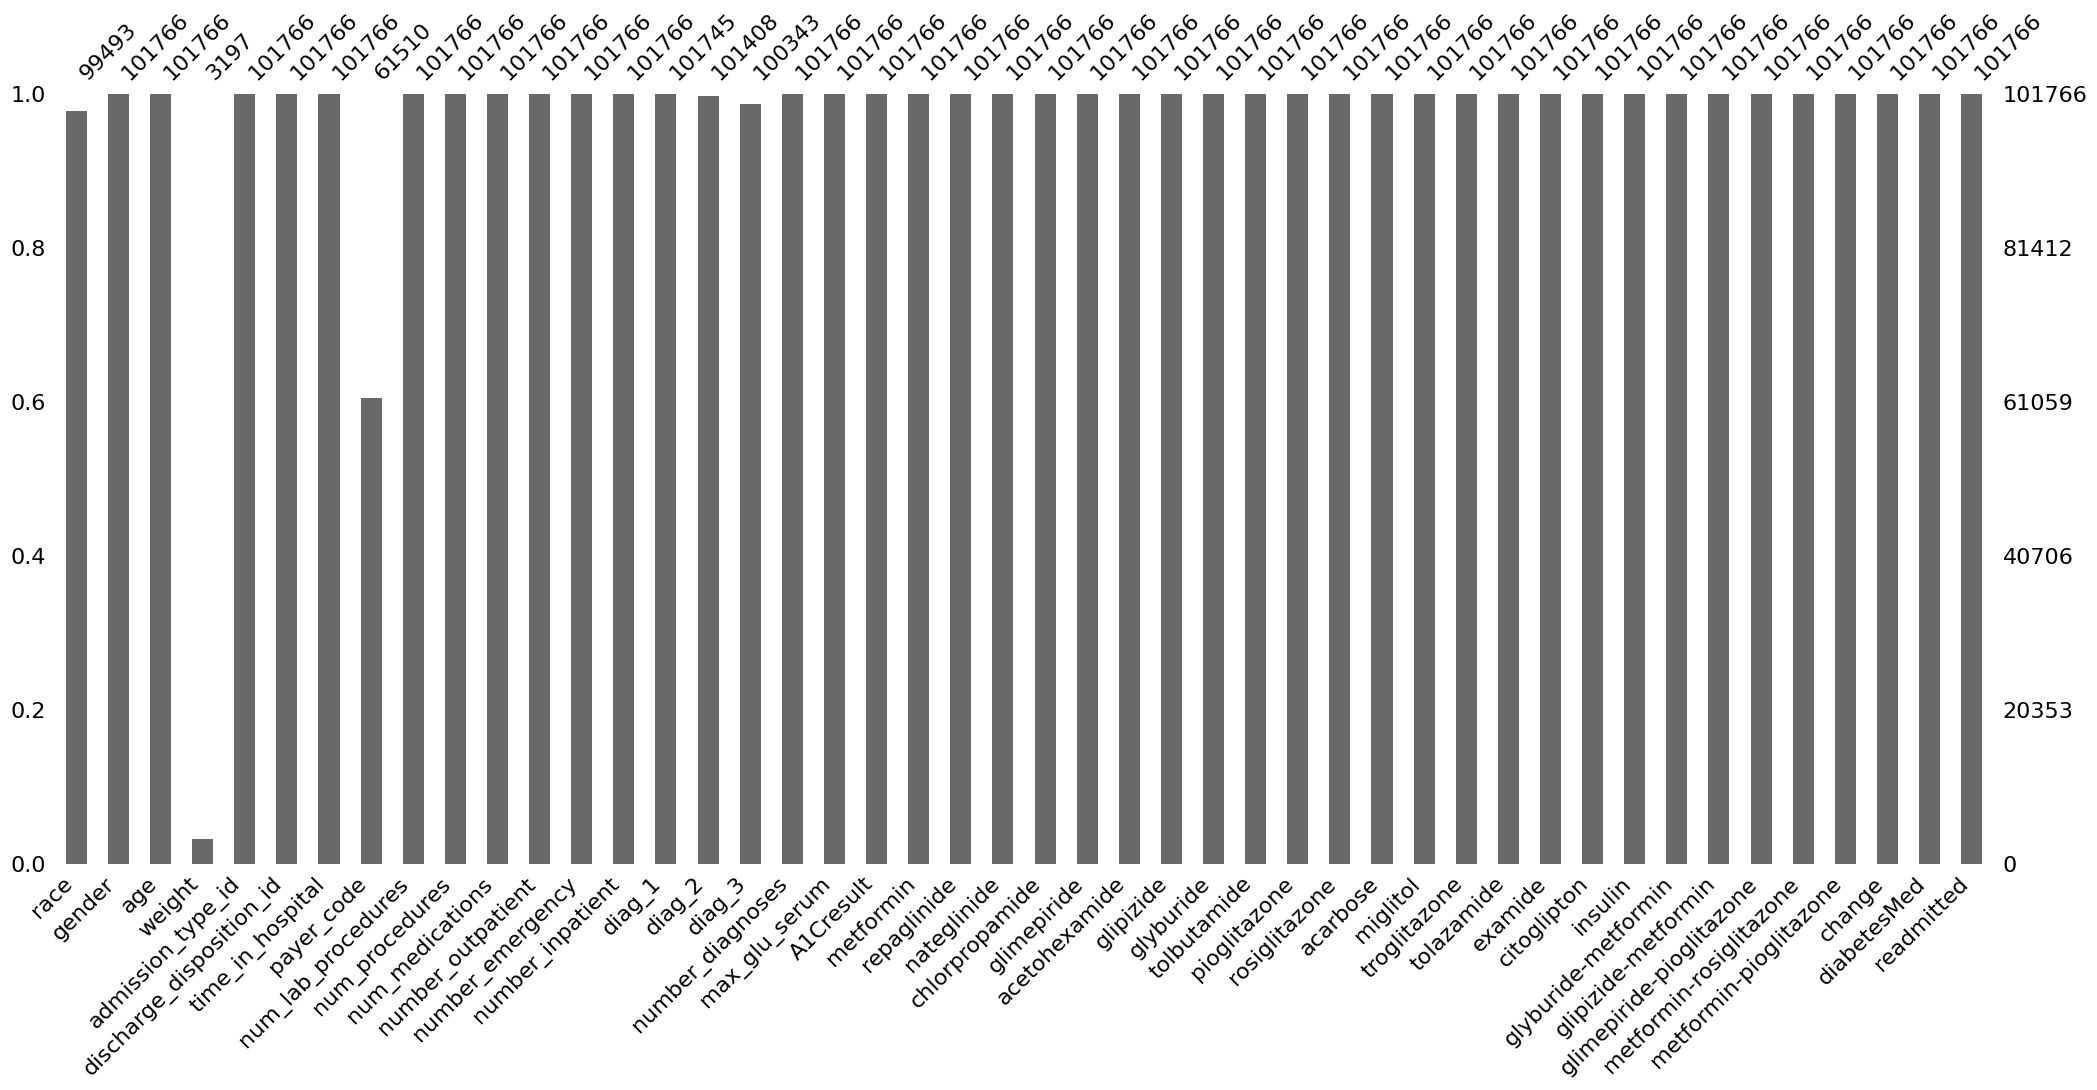

In [91]:
# Visualizing missing data
msno.bar(df1)

<Axes: >

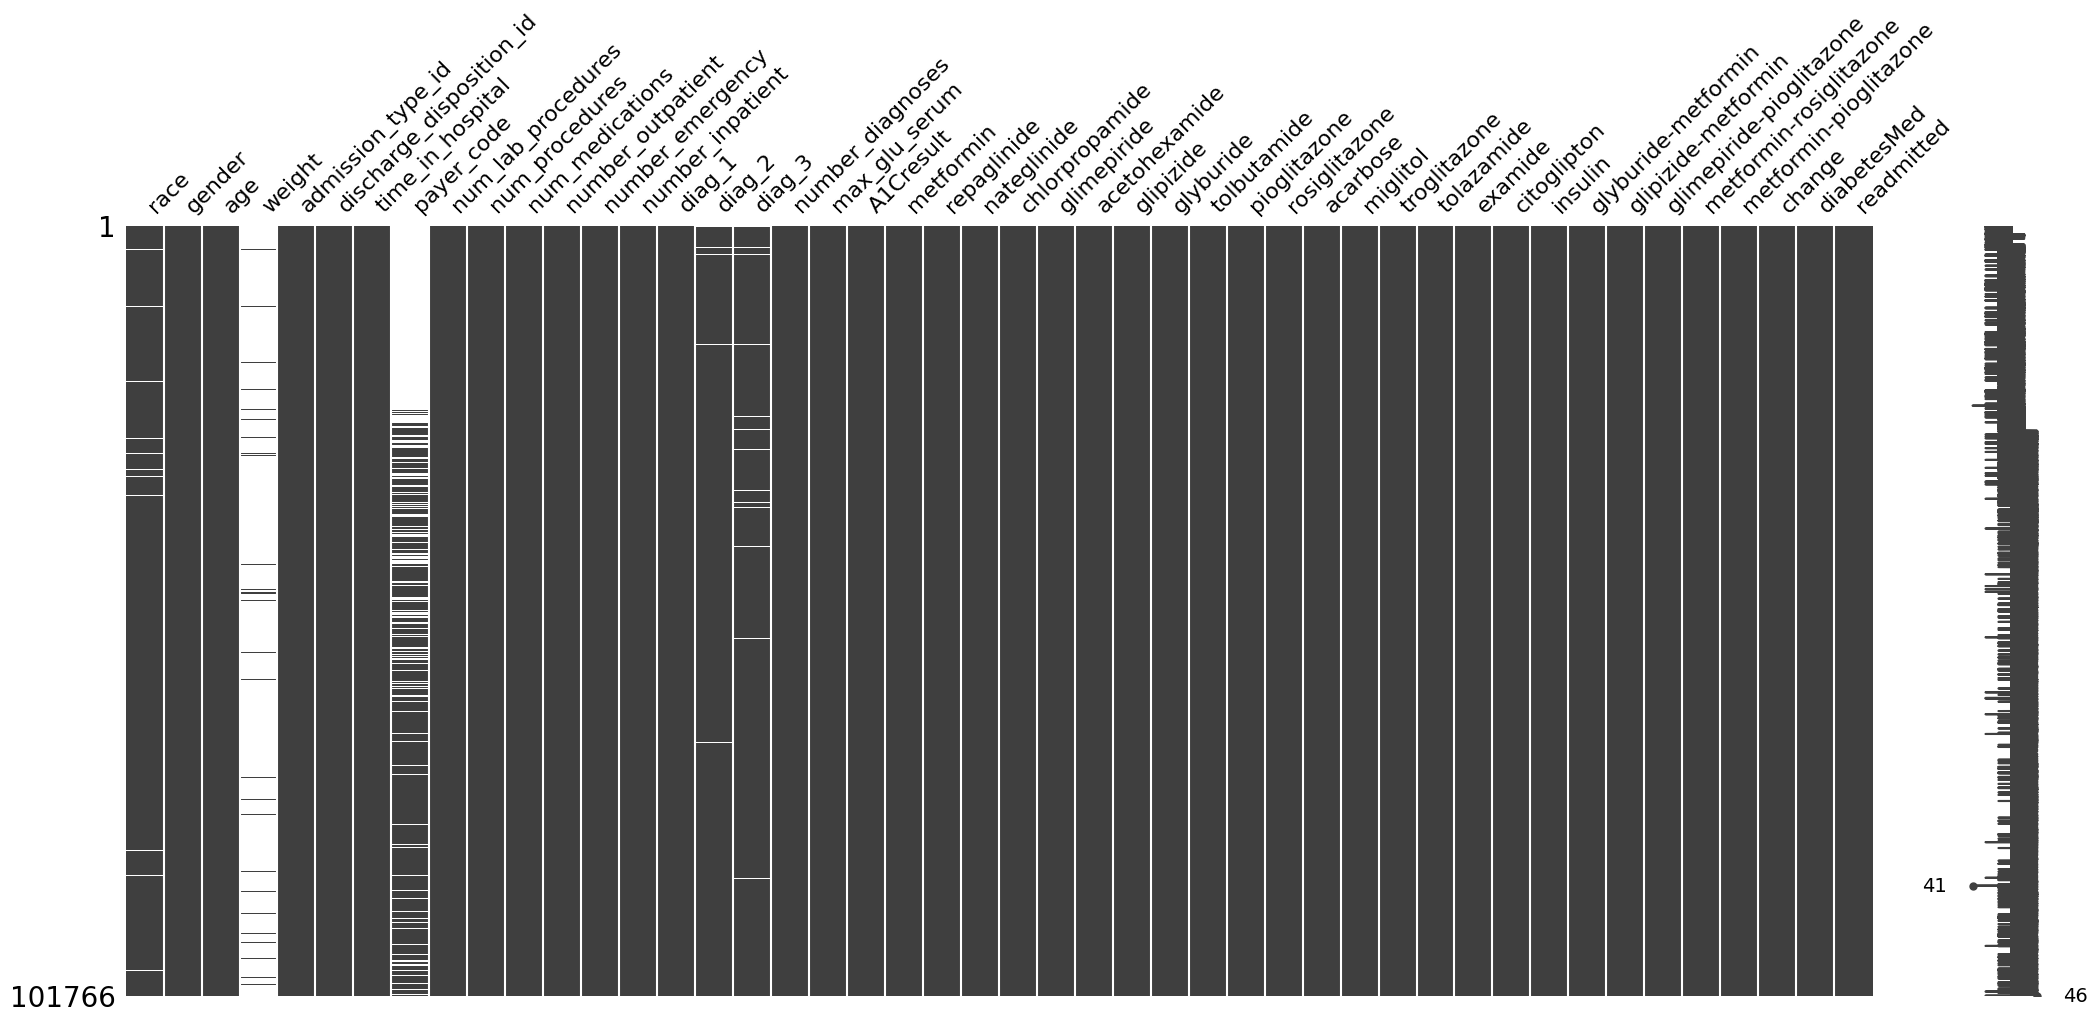

In [94]:
msno.matrix(df1)

# Readmitted Graph

In [93]:
fig = px.histogram(df1, x="readmitted", title='Readmitted', width=400, height=400)
fig.show()